---
title: "Ball and Brown (1968)"
id: sec-bb68
engine: jupyter
jupyter: python3
author: 
  - name: Ian D. Gow
    orcid: 0000-0002-6243-8409
    email: iandgow@gmail.com
date: 2025-12-13
number-sections: true
format:
  html:
    default
  pdf: 
    include-in-header:
      text: |
        \usepackage[group-digits = integer, group-separator={,}, group-minimum-digits = 4]{siunitx}
        \deffootnote{1.6em}{1.6em}{\thefootnotemark.\enskip}
        \addtokomafont{disposition}{\rmfamily}
        \newcommand{\indexc}[1]{\index{#1@\texttt{#1}}}
    colorlinks: true
    geometry:
      - left=2cm
      - right=2cm
    papersize: a4
    mainfont: TeX Gyre Pagella
    mathfont: TeX Gyre Pagella Math
bibliography: papers.bib
---

In this and the following chapter, we cover the first two winners of the Seminal Contributions to Accounting Literature Award: @Ball:1968ub and @Beaver:1968vf.^[The list of winners can be found at <https://go.unimelb.edu.au/yzw8>.]

@Ball:1968ub won the inaugural Seminal Contribution to the Accounting Literature Award with a citation: "No other paper has been cited as often or has played so important a role in the development of accounting research during the past thirty years." 
However, Philip Brown [@Brown:1989tg] recalled in a presentation to the 1989 JAR conference that the paper was rejected by *The Accounting Review* with the editor indicating a willingness to "reconsider the manuscript if Ray and I wished to cut
down the empirical stuff and expand the 'bridge' we had tried to build
between our paper and the accounting literature." [@Brown:1989tg, p.205]

According to @Kothari:2001tr [p. 113], "@Ball:1968ub and Beaver (1968) heralded empirical capital markets research as it is now known."
Prior to that period, accounting research was a largely theoretical discipline focused on **normative research**, that is, research concerned with the "right" or "best" way to account for various events and transactions. \index{Normative research}
In addition to being normative, accounting theory was largely *deductive*, meaning that detailed theories were derived from general principles.

@Beaver:1998 identifies one approach as asking, say, "what properties should the 'ideal' net income have?"
One answer to this question is that accounting income for a period should reflect the change in the net present value of cash flows (plus cash distributions) to shareholders during the period.
But other answers existed.
Accounting researchers would start with a set of desired properties and use these to derive the "best" approach to accounting for depreciation of long-lived assets, inventory, or lease assets.
@Kothari:2001tr points out that there was "little emphasis on the empirical validity" of theory.

Similar ideas still permeate the thinking of standard-setters, who purport to derive detailed accounting standards from their "conceptual frameworks", which outline broad definitions of things such as *assets* and *liabilities* that standard-setters can supposedly use to derive the correct accounting approach in any given setting.

However, in the period since @Ball:1968ub, these approaches have been largely discarded in academic research.
A largely normative, theoretical emphasis has been replaced by a positive, empirical one.

This chapter uses @Ball:2019wu as a kind of reading guide to @Ball:1968ub before considering a replication of @Ball:1968ub styled on that provided by @Nichols:2004tb.

:::{.callout-tip text-align="left"}
This note is a Python version of [Chapter 11](https://iangow.github.io/far_book/bb68.html) of [*Empirical Research in Accounting: Tools and Methods*](https://iangow.github.io/far_book/).
This note uses the packages listed below and relies on the existence of a local data repository of parquet files for WRDS data.
Such a repository can be created using the script found in [Appendix E](https://iangow.github.io/far_book/parquet-wrds.html#sec-make-pq-pg) of [*Empirical Research in Accounting: Tools and Methods*](https://iangow.github.io/far_book/).
This note was written using [Quarto](https://quarto.org) and compiled with [RStudio](https://posit.co/products/open-source/rstudio/), an integrated development environment (IDE) for working with R and, to some extent, Python.
The source code for this note is available [here](https://raw.githubusercontent.com/iangow/notes/main/bb68.qmd) and the latest version of this PDF is [here](https://raw.githubusercontent.com/iangow/notes/main/bb68.pdf).
:::

In [1]:
# ! pip install 'ibis-framework[duckdb]' pandas requests plotnine

In [2]:
import ibis
from ibis import _
import ibis.selectors as s

import pandas as pd
import requests
import zipfile
from io import BytesIO, StringIO
import re
import os
from plotnine import ggplot, aes, geom_line, theme_bw, theme

In [3]:
#| echo: false
ibis.options.interactive = True
ibis.options.repr.show_types = False

## Principal results of @Ball:1968ub

The first two pages of @Ball:1968ub address the (then) extant accounting literature.
This discussion gives the impression that the (academic) conventional wisdom at that time was that accounting numbers were (more or less) meaningless ("the difference between twenty-seven tables and eight chairs") and further research was needed to devise more meaningful accounting systems.

Arguably this notion informs the null hypothesis of @Ball:1968ub.
If accounting numbers are meaningless, then they should bear no relationship to economic decisions made by rational actors.
@Ball:1968ub seek to test this (null) hypothesis by examining the relationship between security returns and unexpected income changes.
@Ball:1968ub argue that "recent developments in capital theory ... [justify] selecting the behavior of security prices as an operational test of usefulness." 

The evidence provided by @Ball:1968ub might not convince critics of the usefulness of adding chairs and tables unless the market is a rational, efficient user of a broader set of information.
There are accounts for the results of @Ball:1968ub that do not rely on such rationality and efficiency.
First, the market might react to "twenty-seven tables less eight chairs" because it does not know what it is doing.
Second, the market might know that "twenty-seven tables less eight chairs" is meaningless, but has no better information to rely upon.
Given the arguments they seek to address, assumptions that the market is (a) efficient and (b) has access to a rich information set beyond earnings seem implicit in the use of security returns in a test of usefulness.

@Ball:2019wu [p. 414] identify three main results of @Ball:1968ub:
"The most fundamental result was that accounting earnings and stock returns were correlated. ...
Nevertheless, annual accounting earnings lacked timeliness. ...
After the earnings announcement month, the API (which cumulated abnormal returns) continued to drift in the same direction."

Figure 1 of @Ball:1968ub depicts the data provided in Table 5 and comprises all three of the principal results flagged by @Ball:2019wu.

The returns reported in Figure 1 of @Ball:1968ub are not feasible portfolios because the earnings variables used to form each portfolio at month $-12$ are not reliably available until month $0$ or later.
Yet one can posit the existence of a mechanism (e.g., a time machine or a magical genie) that would suffice to make the portfolios notionally feasible.
For example, if a genie could tell us whether earnings for the upcoming year for each firm will increase or decrease at month $-12$, we could go long on firms expecting positive news, and go short on firms expecting negative news.^[Actually, because the lines of Figure 1 represent *abnormal* returns, the associated portfolios involve going long or short in each of a group of stocks and short or long in a broader market index at the same time.]
Note that this hypothetical genie is sparing with the information she provides.
For example, we might want further details on how much earnings increased or decreased, but our genie gives us just the sign of the earnings news.

Additionally, we have implicit constraints on the way we can use this information in forming portfolios.
We might do better to adjust the portfolio weights according to other factors, such as size or liquidity, but the portfolios implicit in Figure 1 of @Ball:1968ub do not do this.
Nor do the portfolios represented in Figure 1  involve any opportunity to adjust portfolio weights during the year.

In assessing the relative value of various sources of information, @Ball:1968ub consider three approaches to constructing portfolios, which they denote as *TI*, *NI*, and *II* (@Ball:2019wu denote *II* as *AI* and we follow this notation below).
Using these metrics, @Ball:1968ub [p. 176] conclude that "of all the information about an individual firm which becomes available during a year, one-half or more is captured in that year's income number. ...
However, the annual income report does not rate highly as a timely medium, since most of its content (about 85 to 90 per cent) is captured by more prompt media which perhaps include interim reports."^[For more on the "apparent paradox" discussed on p.176, see @Leftwich:1994ws.]

The third principal result is shown in Table 5, where we see that the income surprise is correlated with the API to a statistically significant extent in each month up to two months after the earnings announcement.^[There are some months where this does not hold, but the statement is broadly true.]

This result, which later become known as **post-earnings announcement drift** (or simply **PEAD**), was troubling to @Ball:1968ub, who argue that some of it may be explained by  "peak-ahead" in the measure of market income and transaction costs causing delays in trade. \index{Post-earnings announcement drift (PEAD)}
We study PEAD more closely in Chapter 14.

### Discussion questions

1.	What is the research question of @Ball:1968ub? 
Do you find the paper to be persuasive?

2. What do you notice about the references in @Ball:1968ub [pp. 177-178]?

3. Given that "the most fundamental result" of @Ball:1968ub relates to an association or correlation, is it correct to say that the paper provides no evidence on causal linkages?
Does this also mean that @Ball:1968ub is a "merely" descriptive paper according to the taxonomy of research papers outlined in Chapter 4?
How might the results of @Ball:1968ub be represented in a causal diagram assuming that accounting information is meaningful and markets are efficient?
Would an alternative causal diagram be assumed by a critic who viewed accounting information as meaningless? \index{Causal diagrams}

4. Describe how Figure 1 of @Ball:1968ub supports each of principal results identified by @Ball:2019wu.

5. Consider the causal diagrams you created above.
Do the results of @Ball:1968ub provide more support for one causal diagram than the other? \index{Causal diagrams}

6. Compare Figure 1 of @Ball:2019wu with Figure 1 of BB68. 
What is common between the two figures? 
What is different?

7. What does "less their average" mean in the title of Figure 1 of @Ball:2019wu? 
What effect does this have on the plot? 
(Does it make this plot different from Figure 1 of BB68? 
Is information lost in the process?)

8. @Ball:2019wu [p. 418] say "in this replication we address two issues with the BB68 significance tests."
Do you understand the points being made here? 

9. @Ball:2019wu [p. 418] also say "the persistence of PEAD over time is evidence it does not constitute market inefficiency."
What do you make of this argument?

10. What is the minimum amount of information that our hypothetical genie needs to provide to enable formation of the portfolios underlying *TI*, *NI*, and *II*?
What are the rules for construction of each of these portfolios?

11. @Ball:1968ub observe a ratio of *NI* to *TI* of about 0.23. 
What do we expect this ratio to be?
Does this ratio depend on the information content of accounting information?

12. Consider the paragraph in @Ball:2019wu [p. 418] beginning "an innovation in BB68 was to estimate ...". 
How do the discussions of these results differ between @Ball:1968ub and @Ball:2019wu?

13. Consider column (4) of Table 2 of @Ball:2019wu.
Is an equivalent set of numbers reported in BB68?
What is the underlying investment strategy associated with this column (this need not be feasible in practice)?

14. Heading 6.3 of @Ball:2019wu is "Does 'useful' disprove 'meaningless'?" 
Do you think that "not meaningless" implies "not useless"?
Which questions (or facts) does BB68 address in these terms?

## Replicating @Ball:1968ub

In this section, we follow @Nichols:2004tb in conducting an updated replication of @Ball:1968ub.

We get earnings and returns data from Compustat and CRSP, respectively.

::: {.content-visible when-format="pdf"}

\indexc{crsp.dsedist} \indexc{crsp.msi} \indexc{crsp.msf} \indexc{crsp.stocknames} \indexc{crsp.ccmxpf\_lnkhist}
\indexc{comp.funda} \indexc{comp.fundq} 

In [4]:
#| eval: false
#| include: true
def load_parquet(con, table, schema, data_dir=None):
    if not data_dir:
        data_dir =  os.path.expanduser(os.environ["DATA_DIR"])
    
    pq_file = pq_dir = os.path.join(data_dir, schema, table + ".parquet")
    return con.read_parquet(pq_file)

In [5]:
#| eval: false
db = ibis.duckdb.connect()

msi = load_parquet(db, "msi", "crsp")
msf = load_parquet(db, "msf", "crsp")
ccmxpf_lnkhist = load_parquet(db, "ccmxpf_lnkhist", "crsp")
stocknames = load_parquet(db, "stocknames", "crsp")

funda = load_parquet(db, "funda", "comp")
fundq = load_parquet(db, "fundq", "comp")

:::

::: {.content-visible when-format="html"}

::: {.panel-tabset}

#### PostgreSQL

In [6]:
#| label: connect-pg-db
#| eval: true
db = ibis.duckdb.connect()
wrds_id = "iangow" # os.getenv("WRDS_ID")
uri = f"postgresql://{wrds_id}@wrds-pgdata.wharton.upenn.edu:9737/wrds"
# uri = f"postgresql://igow@localhost:5432/igow"
db.raw_sql("INSTALL postgres;")
db.raw_sql("LOAD postgres;")
db.raw_sql(f"ATTACH '{uri}' AS pg (TYPE POSTGRES);")

In [7]:
#| eval: true
msf = db.table("msf", database="pg.crsp")
msi = db.table("msi", database="pg.crsp")
ccmxpf_lnkhist = db.table("ccmxpf_lnkhist", database="pg.crsp")
stocknames = db.table("stocknames", database="pg.crsp")
funda = db.table("funda", database="pg.comp")
fundq = db.table("fundq", database="pg.comp")

#### parquet

In [8]:
#| eval: false
#| include: true
def load_parquet(con, table, schema, data_dir=None):
    if not data_dir:
        data_dir =  os.path.expanduser(os.environ["DATA_DIR"])
    
    pq_file = pq_dir = os.path.join(data_dir, schema, table + ".parquet")
    return con.read_parquet(pq_file)

In [9]:
#| eval: false
db = ibis.duckdb.connect()

msi = load_parquet(db, "msi", "crsp")
msf = load_parquet(db, "msf", "crsp")
ccmxpf_lnkhist = load_parquet(db, "ccmxpf_lnkhist", "crsp")
stocknames = load_parquet(db, "stocknames", "crsp")

funda = load_parquet(db, "funda", "comp")
fundq = load_parquet(db, "fundq", "comp")

:::

:::

### Announcement dates and returns data

Getting earnings announcement dates involved significant data-collection effort for @Ball:1968ub.
Fortunately, as discussed in @Ball:2019wu, quarterly Compustat (`comp.fundq`) has data on earnings announcement dates from roughly 1971 onwards. 
Like @Ball:1968ub, we are only interested in fourth quarters and firms with 31 December year-ends.
Because we will need to line up these dates with data from monthly CRSP (`crsp.msf`), we create an `annc_month` variable.

In [10]:
#| label: annc_events
annc_events = (
    fundq
    .filter(
        _.indfmt == "INDL", _.datafmt == "STD",
        _.consol == "C", _.popsrc == "D",
        _.fqtr == 4, _.fyr == 12, _.rdq.notnull()
    )
    .select("gvkey", "datadate", "rdq")
    .mutate(annc_month = fundq.rdq.truncate("month"))
)

To compile returns for months $t-11$ through $t+6$ for each earnings announcement date ($t$) (as @Ball:1968ub and @Nichols:2004tb do), we will need the `date` values on CRSP associated with each of those months.
We will create a table `td_link` that will provide the link between announcement events in `annc_events` and dates on CRSP's monthly stock file (`crsp.msf`).

The first step is to create a table (`crsp_dates`) that orders the dates on monthly CRSP and assigns each month a corresponding "trading date" value (`td`), which is 1 for the first month, 2 for the second month, and so on.
Because the `date` values on `crsp.msf` line up with the `date` values on `crsp.msi`, we can use the latter (much smaller) table.

In [11]:
#| label: crsp_dates
crsp_dates = (
    msi
    .select("date")
    .mutate(
        td = ibis.row_number().over(order_by="date"),
        month = _.date.truncate("month")))

print(crsp_dates.head(10).execute())

        date  td      month
0 1925-12-31   0 1925-12-01
1 1926-01-30   1 1926-01-01
2 1926-02-27   2 1926-02-01
3 1926-03-31   3 1926-03-01
4 1926-04-30   4 1926-04-01
5 1926-05-28   5 1926-05-01
6 1926-06-30   6 1926-06-01
7 1926-07-31   7 1926-07-01
8 1926-08-31   8 1926-08-01
9 1926-09-30   9 1926-09-01


We want to construct a table that allows us to link earnings announcements (`annc_events`) with returns from `crsp.msf`
Because we are only interested in months where returns are available, we can obtain the set of potential announcement months from `crsp_dates`.
The table `annc_months` has each value of `annc_month` and its corresponding `annc_td` from `crsp_dates`, along with the boundaries of the window that contains all values of `td` within the range $(t - 11, t+ 6)$, where $t$ is the announcement month.

In [12]:
#| label: annc_months
annc_months = (
    crsp_dates
    .select(
        _.month.name("annc_month"),
        _.td.name("annc_td"))
    .mutate(start_td = _.annc_td - 11,
            end_td = _.annc_td + 6))

We can then join `annc_months` with `crsp_dates` to create the table `td_link`.

In [13]:
#| label: td_link
td_link = (
    crsp_dates
    .inner_join(annc_months,
          (crsp_dates.td >= annc_months.start_td)
        & (crsp_dates.td <= annc_months.end_td))
    .mutate(rel_td = crsp_dates.td - annc_months.annc_td)
    .select("annc_month", "rel_td", "date")
)

Here are the data for one `annc_month`:

In [14]:
with pd.option_context("display.max_rows", None):
    print(td_link
          .filter(_.annc_month == "2001-04-01")
          .execute())

   annc_month  rel_td       date
0  2001-04-01       6 2001-10-31
1  2001-04-01       5 2001-09-28
2  2001-04-01       4 2001-08-31
3  2001-04-01       3 2001-07-31
4  2001-04-01       2 2001-06-29
5  2001-04-01       1 2001-05-31
6  2001-04-01       0 2001-04-30
7  2001-04-01      -1 2001-03-30
8  2001-04-01      -2 2001-02-28
9  2001-04-01      -3 2001-01-31
10 2001-04-01      -4 2000-12-29
11 2001-04-01      -5 2000-11-30
12 2001-04-01      -6 2000-10-31
13 2001-04-01      -7 2000-09-29
14 2001-04-01      -8 2000-08-31
15 2001-04-01      -9 2000-07-31
16 2001-04-01     -10 2000-06-30
17 2001-04-01     -11 2000-05-31


We use `ccm_link` (as used in Chapter 7) to connect earnings announcement dates on Compustat with returns from CRSP.

In [15]:
#| label: ccm_link
ccm_link = (
    ccmxpf_lnkhist
    .filter(_.linktype.isin(["LC", "LU", "LS"]))
    .filter(_.linkprim.isin(["C", "P"]))
    .mutate(
        permno = _.lpermno,
        linkenddt = _.linkenddt.fill_null(_.linkenddt.max()))
    .select("gvkey", "permno", "linkdt", "linkenddt"))

@Nichols:2004tb focus on firms listed on NYSE, AMEX, and NASDAQ, which correspond to firms with `exchcd` values of 1, 2, and 3, respectively.
The value of `exchcd` for each firm at each point in time is found on `crsp.stocknames`.
Following @Nichols:2004tb, we get data on fiscal years from 1988 to 2002 [-@Nichols:2004tb, p. 270].

In [16]:
#| label: rets_all
rets_all = (
    annc_events
    .inner_join(td_link, "annc_month")
    .inner_join(ccm_link, ["gvkey"])
    .filter(
          (_.annc_month >= ccm_link.linkdt)
        & (_.annc_month <= ccm_link.linkenddt))
    .join(msf,
        (_.permno == msf.permno) & (_.date == msf.date))
    .inner_join(
       stocknames
       .filter(stocknames.exchcd.isin([1, 2, 3]))
       .select("permno", "namedt", "nameenddt"), 
          (_.permno == stocknames.permno)
        & (_.date >= stocknames.namedt)
        & (_.date <= stocknames.nameenddt),
    )
    .select("gvkey", "datadate", "rel_td", "permno", "date", "ret")
    .filter(_.datadate.year().between(1987, 2002))
)

To keep things straightforward, we focus on firms that have returns for each month in the $(t - 11, t+ 6)$ window and the table `full_panel` identifies these firms.

In [17]:
#| label: full_panel
rets_counts = (
    rets_all
    .group_by("gvkey", "datadate")
    .aggregate(n_obs = _.ret.count())
)

max_n_obs = rets_counts.n_obs.max()

full_panel = (
    rets_counts
    .filter(rets_counts.n_obs == max_n_obs)
    .select("gvkey", "datadate"))

In [18]:
#| label: rets
rets = (rets_all
        .inner_join(full_panel, ["gvkey", "datadate"]))

Note that, unlike other early papers [e.g., @Beaver:1968vf; @Fama:1969wc], @Ball:1968ub do not exclude observations due to known confounding events.^[This issue seems related to that discussed on p.164, where @Ball:1968ub state "our prediction [is] that, or certain months around the report dates, the expected values of the $v_j$'s are nonzero."
They defend the absence of an exclusion period on the basis that there is a low, observed autocorrelation in the $v_j$'s, and in no case was the stock return regression fitted over less than 100 observations." [@Ball:1968ub p.164].
But note that the basis for assuming that the expected value of $v_j$ is nonzero in any given month is much less clear in this setting than it was in @Fama:1969wc. 
Given that a company will announce earnings in a particular month, this announcement could be either good or bad news, so the expected abnormal return seems likely to be zero.]

### Data on size-portfolio returns

@Ball:1968ub focus on **abnormal returns** and estimate a market model with firm-specific coefficients as the basis for estimating residual returns, which they denote API. \index{Returns!abnormal}
The use of residuals from a market model addresses a concern about cross-sectional correlation that would arise if raw returns were used. 
@Ball:1968ub note that about $10\%$ of returns are due to industry factors, but conclude that the likely impact of this on inference is likely to be small.

In contrast, @Nichols:2004tb use **size-adjusted returns** as their measure of abnormal returns. \index{Returns!size-adjusted}
To calculate size-adjusted returns, we get two kinds of data from the [website of Ken French](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) (as seen in Chapter 9).

First, we get data on size-decile returns.
Ken French's website supplies a comma-delimited text file containing monthly and annual data for value-weighted and equal-weighted portfolio returns.

In [19]:
def url_to_lines(url: str) -> pd.DataFrame:
    # Download zip
    resp = requests.get(url)
    resp.raise_for_status()

    # Read inner text file
    with zipfile.ZipFile(BytesIO(resp.content)) as zf:
        inner_name = zf.namelist()[0]
        raw = zf.read(inner_name).decode("latin1")
        lines = raw.splitlines()

    return lines

In [20]:
url = ("https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/"
       "Portfolios_Formed_on_ME_CSV.zip")

lines = url_to_lines(url)

In [21]:
#| label: find-panels
#| echo: false
def str_which(x, pattern):
    matching_lines = [i for i, s in enumerate(lines) if re.search(pattern, s)]
    return min(matching_lines)

vw_start = str_which(lines, r"^\s+.*Value Weight.*Monthly") + 1
vw_end = str_which(lines, r"^\s+.*Equal Weight.*Monthly") - 2

ew_start = str_which(lines, r"^\s+.*Equal Weight.*Monthly") + 1
ew_end = str_which(lines, r"^\s+Value Weight.*Annual") - 2

From inspection of the downloaded text file, we observe that there are several data sets in this file. 
We want monthly returns and will extract both value-weighted and equal-weighted data.
We see that the equal-weighted returns begin after a row starting with text "`{python} lines[ew_start - 1].strip()`" and end two rows before a row starting with text "`{python} lines[ew_end + 2].strip()`".

In [22]:
#| eval: false
#| echo: true
def str_which(x, pattern):
    matching_lines = [i for i, s in enumerate(lines) if re.search(pattern, s)]
    return min(matching_lines)

vw_start = str_which(lines, r"^\s+.*Value Weight.*Monthly") + 1
vw_end = str_which(lines, r"^\s+.*Equal Weight.*Monthly") - 2

ew_start = str_which(lines, r"^\s+.*Equal Weight.*Monthly") + 1
ew_end = str_which(lines, r"^\s+Value Weight.*Annual") - 2

In [23]:
def lines_to_df(start, end, header = 'infer'):
    block = "\n".join(lines[start:end])
    df_raw = pd.read_csv(StringIO(block), na_values="-99.99",
                         header=header)
    df_raw = df_raw.rename(columns={df_raw.columns[0]: "date"})
    return df_raw

def read_data(start, end):
    
    # Do minimal preprocessing with pandas
    df_raw = lines_to_df(start, end)

    # Move data to Ibis for remaining processing
    t = (ibis.memtable(df_raw)
        .mutate(month = (_.date.cast("string") + "01")
                          .as_date("%Y%m%d"))
        .pivot_longer(
            ~s.cols("month"),
            names_to = "quantile",
            values_to = "ret")
        .mutate(
            ret = _.ret / 100.0,
            decile=ibis.cases(
                (_.quantile == "Hi 10", "10"),
                (_.quantile == "Lo 10", "1"),
                (_.quantile.contains("-Dec"), 
                    _.quantile.replace("-Dec", "")),
                else_=ibis.null()).cast("int"))
        .filter(_.decile.notnull())
        .select("month", "ret", "decile")
        .order_by(["month", "decile"]))

    return t

In [24]:
#| eval: true
vw_rets = read_data(vw_start, vw_end)
ew_rets = read_data(ew_start, ew_end)

size_rets = (
    ew_rets
    .select("month", "decile", _.ret.name("ew_ret"))
    .inner_join(
        vw_rets
        .select("month", "decile", _.ret.name("vw_ret")),
        ["month", "decile"])
    .order_by(["month", "decile"])
)

print(size_rets.head(10).execute())

       month  decile  ew_ret  vw_ret
0 1926-07-01       1 -0.0169 -0.0062
1 1926-07-01       2  0.0033  0.0057
2 1926-07-01       3 -0.0024 -0.0013
3 1926-07-01       4  0.0090  0.0085
4 1926-07-01       5  0.0145  0.0139
5 1926-07-01       6  0.0186  0.0189
6 1926-07-01       7  0.0160  0.0159
7 1926-07-01       8  0.0140  0.0131
8 1926-07-01       9  0.0338  0.0353
9 1926-07-01      10  0.0316  0.0367


The second set of data we need to get from Ken French's website is data on the cut-offs we will use in assigning firms to decile portfolios in calculating size-adjusted returns:

In [25]:
url_bp = ("https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/"
          "ME_Breakpoints_CSV.zip")

lines = url_to_lines(url_bp)

Again the original data come in a "wide" format with cut-offs at every fifth percentile, so again we rearrange the data into a "long" format, retain only the deciles (i.e., every tenth percentile), and rename the decile labels from `p10`, `p20`, ..., `p90`, and `p100`, to `1`, `2`, ..., `9`, and `10`.^[Unlike the data set on returns above, there are no column labels in this data set and we are making those ourselves here.]

In [26]:
#| label: me_breakpoints
me_last = str_which(lines, r"^Copyright") - 1

df_raw = lines_to_df(1, me_last, header=0)
df_raw.columns = ["month", "n"] + ["p" + str(i)
                     for i in range(5, 101, 5)]

me_breakpoints_raw = (
    ibis.memtable(df_raw)
    .mutate(month = (_.month.cast("string") + "01")
                      .as_date("%Y%m%d"))
    .select(s.all() & ~s.endswith("5") & ~s.cols("n"))
    .pivot_longer(
        ~s.cols("month"),
        names_to = "decile",
        values_to = "cutoff")
    .mutate(decile = _.decile
        .re_replace(r"^p(.*)0$", r"\1").cast("int"))
    .select("month", "decile", "cutoff")
    .order_by(["month", "decile"])
)

Finally, we organize the data to facilitate their use in joining with other data.
Specifically, we create variables for the range of values covered by each decile (from `me_min` to `me_max`).
We specify the minimum value for the first decile as zero and the maximum value for the tenth decile to infinity (`inf`).

In [27]:
w = ibis.window(group_by=_.month, order_by=_.decile)

me_breakpoints = (
    me_breakpoints_raw
    .mutate(
        me_min=ibis.coalesce(_.cutoff.lag().over(w), 0),
        me_max=_.cutoff)
    .mutate(me_max=ibis.ifelse(_.decile == 10, float("inf"), _.me_max))
    .drop("cutoff")
    .order_by(["month", "decile"])
)

To assign stocks to size deciles, we collect data on market capitalization from `crsp.msf`.
Also, we are only interested in the cut-offs for December in each year and use `filter()` to retain only these.

In [28]:
#| label: me_values
me_values = (
    msf
    .mutate(
        mktcap = _.prc.abs() * _.shrout / 1000,
        month = _.date.truncate("month"))
    .select("permno", "date", "mktcap", "month")
    .filter(_.month.month() == 12)
)

We can compare market capitalization for each firm-year with the cut-offs in `me_breakpoints` to obtain its decile assignment.

In [29]:
#| label: me_deciles
me_decile_assignments = (
    me_values
    .inner_join(me_breakpoints,
        [_.month == me_breakpoints.month,
         _.mktcap >= me_breakpoints.me_min,
         _.mktcap < me_breakpoints.me_max])
    .mutate(year=(_.date.year() + 1).cast("int"))
    .select("permno", "year", "decile")
)

### Earnings news variables

The main issue that @Ball:1968ub need to tackle regarding earnings news is one that persists in accounting research today: how does one measure the unanticipated component of income?
Alternatively, how does one estimate earnings expectations of the "market"?

@Ball:1968ub use two measures of expected earnings.
The first is a naive model that simply "predicts that income will be the same for this year as for the last" [-@Ball:1968ub, p. 163].
The second uses a model that estimates a relationship between the changes in income for a firm and for the market and then applies that relationship to the contemporaneous observation of the market's income.
Note that this is an interesting variable: the equity market does not know the income for all firms at the start of the year.
So the expectation is conditional with respect to a rather peculiar information set.
In effect, the question is whether, given information about the market's earnings and market returns, information about accounting earnings helps predict the unexpected portion of earnings.
In any case, the main results (see the famous Figure 1) are robust to the choice of the expectations model.

In [30]:
#| label: news
w_gvkey = ibis.window(group_by=[funda.gvkey], order_by=[funda.datadate])
w_date_earn = ibis.window(group_by=_.datadate, order_by=_.earn_chg)
w_date_cfo = ibis.window(group_by=_.datadate, order_by=_.cfo_chg)

news = (
    funda
    .filter(_.indfmt == "INDL", _.datafmt == "STD",
            _.consol == "C", _.popsrc == "D",
            _.fyr == 12)
    .mutate(
        lag_ibc=_.ibc.lag().over(w_gvkey),
        lag_oancf=_.oancf.lag().over(w_gvkey),
        lag_at=_.at.lag().over(w_gvkey),
        lag_fyear=_.fyear.lag().over(w_gvkey))
    .filter(_.fyear.between(1987, 2002),
            _.lag_fyear + 1 == _.fyear)
    .mutate(earn_chg = ibis.ifelse(_.lag_at > 0,
              (_.ibc - _.lag_ibc) / _.lag_at, ibis.null()),
        cfo_chg = ibis.ifelse(_.lag_at > 0,
              (_.oancf - _.lag_oancf) / _.lag_at, ibis.null()))
    .select("gvkey", "datadate", "earn_chg", "cfo_chg")
    .mutate(
        earn_gn = _.earn_chg > 0,
        cfo_gn = _.cfo_chg > 0)
    .filter(_.cfo_gn.notnull(), _.earn_gn.notnull())
    .mutate(
        earn_decile = ibis.ntile(10).over(w_date_earn),
        cfo_decile = ibis.ntile(10).over(w_date_cfo)
    )
)

### Figure 1 of @Ball:1968ub

We can now merge our data tables to create the data set we can use to make variants of Figure 1 of @Ball:1968ub.


To prepare the data for our plot, we first need to accumulate returns over time for each firm.
We then need to aggregate these returns by portfolio (here `earn_gn`) and relative trading date (`rel_td`).
Following @Ball:1968ub, we calculate abnormal returns by subtracting market returns from the portfolio returns.
Here we calculate measures using both equa l-weighted (`ew_ret`) and value-weighted (`vw_ret`) market returns.

In [31]:
#| label: merged
merged = (
    news
    .mutate(year = _.datadate.year())
    .inner_join(rets, ["gvkey", "datadate"])
    .inner_join(me_decile_assignments, ["permno", "year"])
    .mutate(month = _.date.truncate("month"))
    .inner_join(size_rets, ["decile", "month"])
    .drop(["permno", "month"])
)

# merged = db.create_table("merged", merged_expr, overwrite=True)

To prepare the data for our plot, we first need to accumulate returns over time for each firm.
We then need to aggregate these returns by portfolio (here `earn_gn`) and relative trading date (`rel_td`).
Following @Ball:1968ub, we calculate abnormal returns by subtracting market returns from the portfolio returns.
Here we calculate measures using both equal-weighted (`ew_ret`) and value-weighted (`vw_ret`) market returns.

In [32]:
#| label: plot_data
# columns ending with "ret" in merged (e.g., ret, ew_ret, vw_ret)
ret_cols = [c for c in merged.columns if c.endswith("ret")]

w = ibis.window(group_by=[_.gvkey, _.datadate], order_by=_.rel_td)

def cumprod1p(x):
    # cumprod(1 + x) = exp(cumsum(log(1 + x)))
    return (1 + x).ln().cumsum().over(w).exp().cast("float64")

plot_data = (
    merged
    .filter(_.ret.notnull())
    .mutate(**{c: cumprod1p(_[c]) for c in ret_cols})
    .group_by([_.rel_td, _.earn_gn])
    .aggregate(**{c: _[c].mean() for c in ret_cols})
    .mutate(
        aret_ew=_.ret - _.ew_ret,
        aret_vw=_.ret - _.vw_ret)
    .order_by(["earn_gn", "rel_td"])
    .mutate(
    **{
        "Earnings news": ibis.ifelse(_.earn_gn, "Good", "Bad")
    })
    .execute()
)

Figure 1 of @Ball:1968ub confirms that a picture is worth a thousand words.
We produce our analogue of Figure 1 in @fig-bb-1.

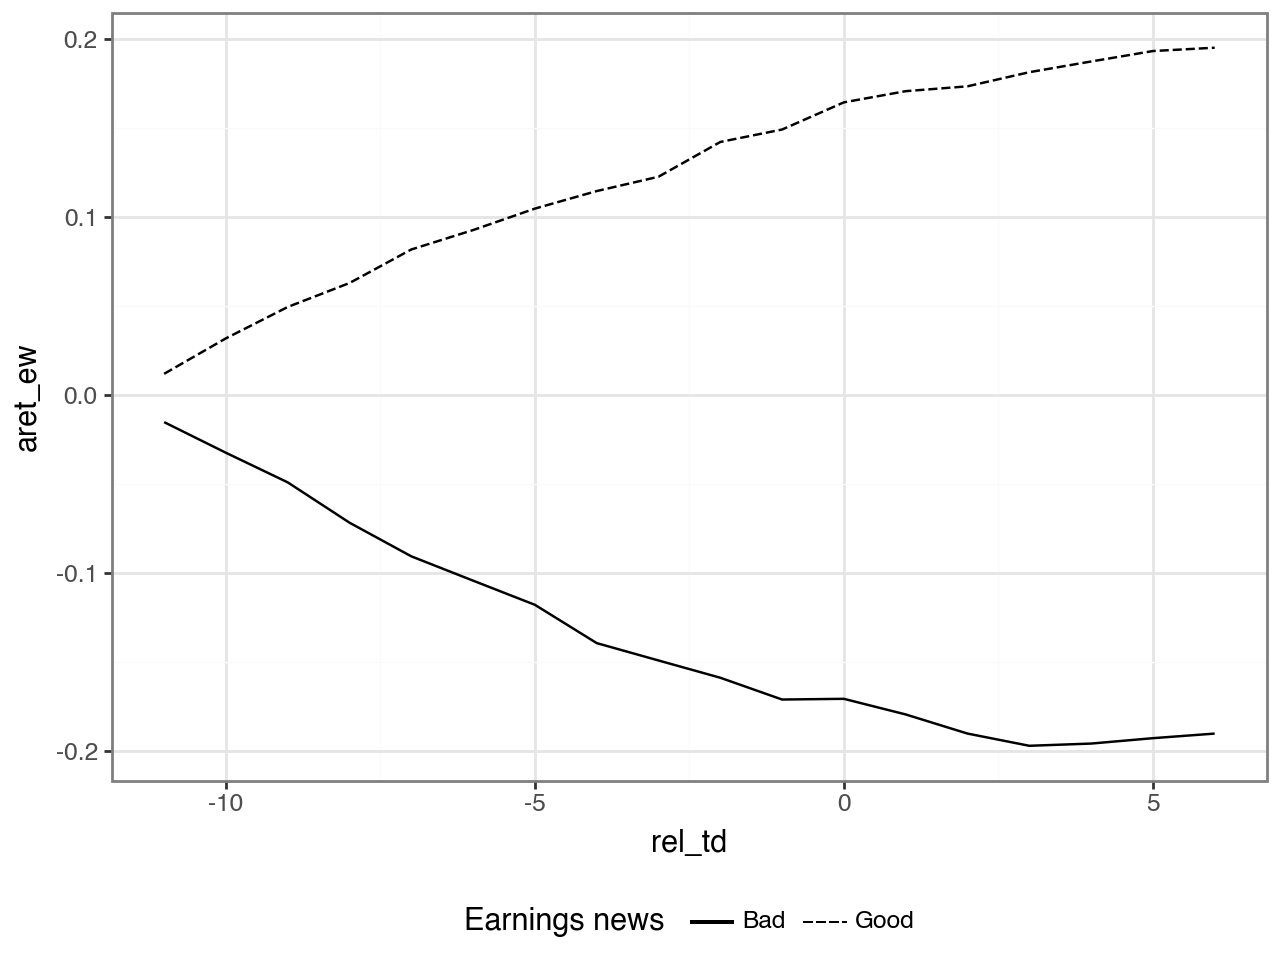

In [33]:
#| label: fig-bb-1
#| fig-cap: "Replication of Figure 1 of Ball and Brown (1968)."
#| fig-alt: "Cumulative abnormal returns for good vs bad earnings news around annual earnings announcements."
(ggplot(plot_data,
        aes("rel_td", "aret_ew", 
            linetype="Earnings news", group="Earnings news"))
    + geom_line()
    + theme_bw()
    + theme(legend_position="bottom"))

### Exercises

In [34]:
#| include: false
#| eval: true
max_cutoff = (me_breakpoints_raw
    .filter(_.month == "2020-12-01", _.decile == 10)
    .select("cutoff")
    .aggregate(x=_.cutoff.mean())
    .execute())

max_cutoff = float(max_cutoff.iloc[0, 0])

1. From the data below, we see that the upper bound for the tenth decile is about `{python} f"US${max_cutoff/1000:.3g}"` billion.
How can we reconcile this with the existence of firms with market capitalizations over US\$1 trillion?
*Bonus*: Using data from `crsp.msf`, identify the firm whose market capitalization was `{python} f"US${max_cutoff/1000:.3g}"` billion in December 2020?
(*Hint*: For the bonus question, you can add a `filter()` to code in the template to obtain the answer.
Why do we need to group by `permco`, not `permno`, to find the answer?)

In [35]:
#| eval: true
print(me_breakpoints_raw.filter(_.month == "2020-12-01").execute())

       month  decile     cutoff
0 2020-12-01       1     327.37
1 2020-12-01       2     772.82
2 2020-12-01       3    1464.26
3 2020-12-01       4    2466.20
4 2020-12-01       5    3667.47
5 2020-12-01       6    5550.69
6 2020-12-01       7    9723.16
7 2020-12-01       8   17140.12
8 2020-12-01       9   37015.10
9 2020-12-01      10  543614.58


2. To keep things straightforward, we focused on firms that have returns for each month in the $(t - 11, t+ 6)$ window.
Can you tell what approach @Nichols:2004tb took with regard to this issue?

3. Table 2 of @Nichols:2004tb measures cumulative abnormal returns as the "cumulative raw return minus cumulative size decile portfolio to which the firm begins."
Apart from the use of a size-decile portfolio rather than some other market index, how does this measure differ from the Abnormal Performance Index (API) defined on p.168 of @Ball:1968ub?
Adjust the measure depicted in the replication of Figure 1 to more closely reflect the API definition used in @Ball:1968ub (but retaining the size-decile as the benchmark).
Does this tweak significantly affect the results?
Which approach seems most appropriate?
That of @Nichols:2004tb or that of @Ball:1968ub?

4. Create an alternative version of @fig-bb-1 using the sign of "news" about cash flows in the place of income news.
Do your results broadly line up with those in Panel A of Figure 2 of @Nichols:2004tb?
Do these results imply that accounting income is inherently more informative than cash flows from operations?
Why or why not?

5. Create an alternative version of the figure above focused on the extreme earnings deciles in place of the good-bad news dichotomy.
Do your results broadly line up with those in Panel B of Figure 2 of @Nichols:2004tb?

6. Calculate *AI* by year following the formula on p. 175 of @Ball:1968ub (there denoted as $II_0$).
You may find it helpful to start with the code producing `plot_data` above.
You may also find it helpful to use `pivot_wider()` to get information about portfolios in each year into a single row.
Note that you will only be interested in rows at $t = 0$ (e.g., `filter(rel_td == 0)`). 

7. Calculate *NI* by year following the formula on p. 175 of @Ball:1968ub (there denoted as $NI_0$).
Note that you will only be interested in rows at $t = 0$ (e.g., `filter(rel_td == 0)`).
  
8. Using the data on *NI* and *AI* from above, create a plot of $AI/NI$ like that in Figure 2 of @Ball:2019wu.
Do you observe similar results to those shown in Figure 2 of @Ball:2019wu?

## References {-}